# Foundations for statistical inference - Sampling distributions

In this lab, we investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We’re interested in formulating a sampling distribution of our estimate in order to learn about the properties of the estimate, such as its distribution.

## The data

We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor’s office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let’s load the data.

In [28]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from pathlib import Path

sns.set_theme()

# Setting the seed
np.random.seed(0)


In [29]:
ames_path = Path("./ames.csv")
ames_df = pd.read_csv(ames_path)


We see that there are quite a few variables in the data set, enough to do a very in-depth analysis. For this lab, we’ll restrict our attention to just two of the variables: the above ground living area of the house in square feet (`Gr.Liv.Area`) and the sale price (`SalePrice`). To save some effort throughout the lab, create two variables with short names that represent these two variables.

In [30]:
area = ames_df["Gr.Liv.Area"]
price = ames_df["SalePrice"]



Let’s look at the distribution of area in our population of home sales by calculating a few summary statistics and making a histogram.

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64


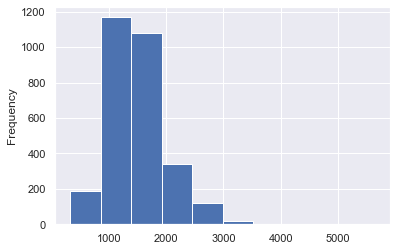

In [31]:
print(area.describe())

area.plot.hist()
plt.show()

### Exercise 1 - Describe this population distribution.

The distribution is quite symmetric though it's evidently right-skewed (though not by a lot).

## The unknown sampling distribution

In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [32]:
samp1 = area.sample(50)

This command collects a simple random sample of size 50 from the vector `area`, which is assigned to `samp1`. This is like going into the City Assessor’s database and pulling up the files on 50 random home sales. Working with these 50 files would be considerably simpler than working with all 2930 home sales.

### Exercise 2 - Describe the distribution of this sample. How does it compare to the distribution of the population?

To do so, we need to plot an histogram of such sample and see how it looks.

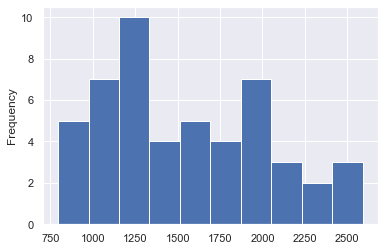

In [33]:
samp1.plot.hist()
plt.show()


And we can see that it is evidently right-skewed.

If we’re interested in estimating the average living area in homes in Ames using the sample, our best single guess is the sample mean.


In [34]:
samp1.mean()

1556.06

Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of 1499.69 square feet. In general, though, the sample mean turns out to be a pretty good estimate of the average living area, and we were able to get it by sampling less than 3% of the population.

### Exercise 3 - Take a second sample, also of size 50, and call it samp2. How does the mean of samp2 compare with the mean of samp1? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

In [35]:
samp2 = area.sample(50)

print(f"Mean samp1 = {samp1.mean()} and mean samp2 {samp2.mean()}.")

Mean samp1 = 1556.06 and mean samp2 1536.88.


Of course, the greater the sample size, the more accurate the mean.

Not surprisingly, every time we take another random sample, we get a different sample mean. It’s useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the _sampling distribution_, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

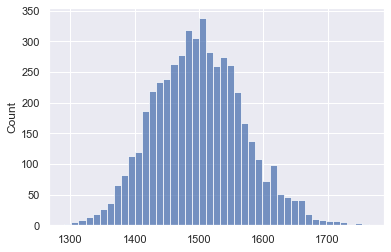

In [36]:
sample_means50 = np.array([area.sample(50).mean() for _ in range(5000)])

sns.histplot(sample_means50)
plt.show()


If you would like to adjust the bin width of your histogram to show a little more detail, you can do so by changing the `bins` argument.

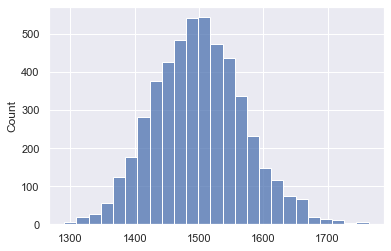

In [37]:
sns.histplot(sample_means50, bins=25)
plt.show()

### Exercise 4 - How many elements are there in sample_means50? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?

The center of the sampling distribution is the true population mean. If we collect more sample means, nothing would change, since what makes everything change is the sample size.

## Interlude: The `for` loop

Let’s take a break from the statistics for a moment to let that last block of code sink in. You have just run your first `for` loop, a cornerstone of computer programming. The idea behind the for loop is _iteration_: it allows you to execute code as many times as you want without having to type out every iteration. In the case above, we wanted to iterate the two lines of code inside the curly braces that take a random sample of size 50 from `area` then save the mean of that sample into the `sample_means50` vector. Without the `for` loop, this would be painful, since you would have to explicitly write (for 5000 times!) the lines of code which create the sample, compute the mean and store it.

### Exercise 5 - To make sure you understand what you’ve done in this loop, try running a smaller version. Initialize a vector of 100 zeros called `sample_means_small`. Run a loop that takes a sample of size 50 from `area` and stores the sample mean in `sample_means_small`, but only iterate from 1 to 100. Print the output to your screen (type `sample_means_small` into the console and press enter). How many elements are there in this object called `sample_means_small`? What does each element represent? 

There will be 100 elements, each storing the mean of each sample.

## Sample size and the sampling distribution

Mechanics aside, let’s return to the reason we used a for loop: to compute a sampling distribution, specifically, this one.

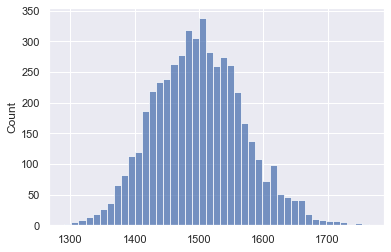

In [39]:
sns.histplot(sample_means50)
plt.show()

The sampling distribution that we computed tells us much about estimating the average living area in homes in Ames. Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the the population, and the spread of the distribution indicates how much variability is induced by sampling only 50 home sales.

To get a sense of the effect that sample size has on our distribution, let’s build up two more sampling distributions: one based on a sample size of 10 and another based on a sample size of 100.

In [42]:
sample_means10 = np.array([area.sample(10).mean() for _ in range(5000)])
sample_means100 = np.array([area.sample(100).mean() for _ in range(5000)])


Here we’re able to use a single `for` loop to build two distributions by adding additional lines inside the curly braces. Don’t worry about the fact that `samp` is used for the name of two different objects. In the second command of the `for` loop, the mean of `samp` is saved to the relevant place in the vector `sample_means10`. With the mean saved, we’re now free to overwrite the object `samp` with a new sample, this time of size 100. In general, anytime you create an object using a name that is already in use, the old object will get replaced with the new one.

To see the effect that different sample sizes have on the sampling distribution, plot the three distributions on top of one another.

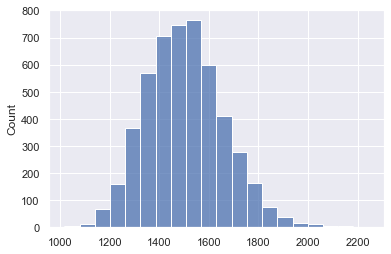

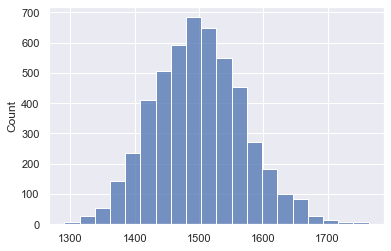

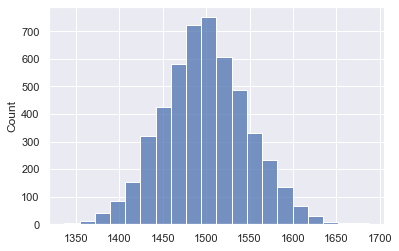

In [43]:
sns.histplot(sample_means10, bins=20)
plt.show()

sns.histplot(sample_means50, bins=20)
plt.show()

sns.histplot(sample_means100, bins=20)
plt.show()


### Exercise 6 - When the sample size is larger, what happens to the center? What about the spread?

As the sample size increases, the center becomes the true population mean and the spread decreases.

## On your own

### 1. Take a random sample of size 50 from `price`. Using this sample, what is your best point estimate of the population mean?

In [44]:
price.sample(50).mean()

205127.52

### 2. Since you have access to the population, simulate the sampling distribution for `x_price` by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called `sample_means50`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

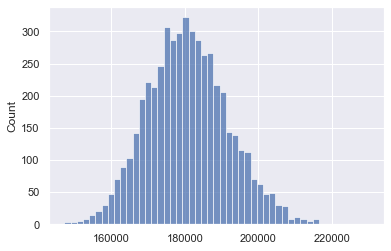

Population mean is 180796.0600682594.


In [51]:
sample_means50 = np.array([price.sample(50).mean() for _ in range(5000)])

sns.histplot(sample_means50)
plt.show()

print(f"Population mean is {price.mean()}.")


The population mean is computed above, however we still see a normal-shaped distribution center around the true population mean. I would say that 18,000 is the average price from this distribution.

### 3. Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

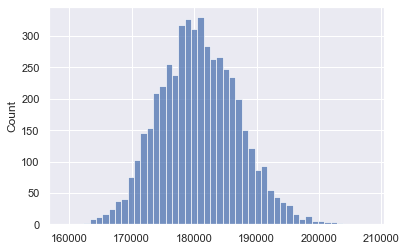

In [52]:
sample_means150 = np.array([price.sample(150).mean() for _ in range(5000)])

sns.histplot(sample_means150)
plt.show()

The average price here is slightly more that 18,000. However, we can see that we got a more accurate result with a bit less spread: this is because we increased the sample size.

### 4. Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

The last one has a smaller spread, since its sample size is bigger, thus we can deduct that a greater sample size is always preferred.